In [66]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import os

if os.getcwd().split("/")[-1] != "Road-Segmentation-ML":
    os.chdir("..")
print("CWD:", os.getcwd())

CWD: /home/nadezhda/Desktop/Road-Segmentation-ML


In [78]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# import dataset classes
from datasets.BaseDataset import BaseDataset
from datasets.TransformDataset import TransformDataset

# import models wrappers
from models.UNetV1 import UNetV1
from models.UNetV2 import UNetV2
from models.UNetV3 import UNetV3
from models.DeepLabV3 import ResNet50

# import utils
from postprocessing import *
from utils import calculate_metrics

In [79]:
# select checkpoint
MODEL = "models/checkpoints/unet-v3-effnet-flips-rotations.pt"
# load checkpoint
try:
    checkpoint = torch.load(MODEL)
except:
    print("Loading checkpoint failed. Trying to load it with map_location.")
    checkpoint = torch.load(MODEL, map_location=torch.device("cpu"))
# create model
model = UNetV3()
# load model weights
model.load_state_dict(checkpoint)

Loading checkpoint failed. Trying to load it with map_location.


<All keys matched successfully>

In [80]:
# paths to image and ground truth folders (VALIDATION)
image_folder = ["datasets/validation/images/"]
gt_folder = ["datasets/validation/groundtruth/"]
# create base dataset
dataset = BaseDataset(image_folder, gt_folder)

In [81]:
# set normalization flag: "A" for AIcrowd, "AM" for AIcrowd + Massachusetts, "AK" for AIcrowd + Kaggle
normalization_flag = "A"
if normalization_flag == "A":
    # AIcrowd dataset only
    mean = [0.3353, 0.3328, 0.2984]
    std = [0.1967, 0.1896, 0.1897]
elif normalization_flag == "AM":
    # AIcrowd + Massachusetts dataset
    mean = [0.3580, 0.3650, 0.3316]
    std = [0.1976, 0.1917, 0.1940]
elif normalization_flag == "AK":
    # AIcrowd + Kaggle dataset
    mean = [0.5268, 0.5174, 0.4892]
    std = [0.1967, 0.1894, 0.1867]

In [82]:
# define image transform
image_transform = transforms.Compose(
    [
        transforms.Resize((384, 384)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ]
)
# define gt tranform
gt_transform = transforms.Compose(
    [transforms.Resize((384, 384)), transforms.ToTensor()]
)

### Visualization

Without postprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


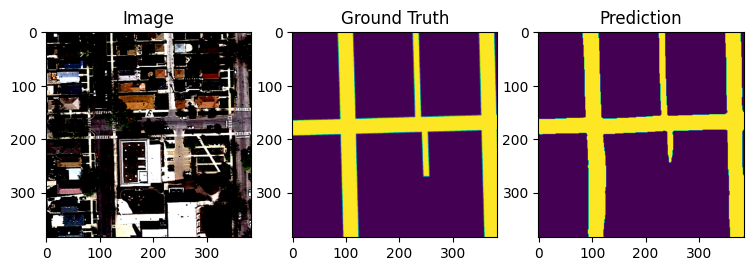

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


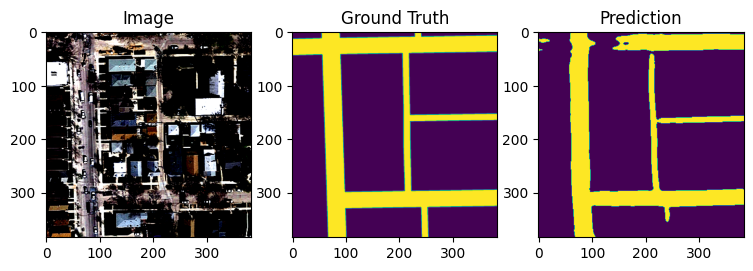

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


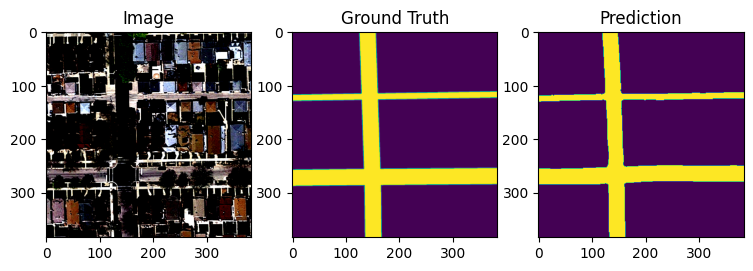

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


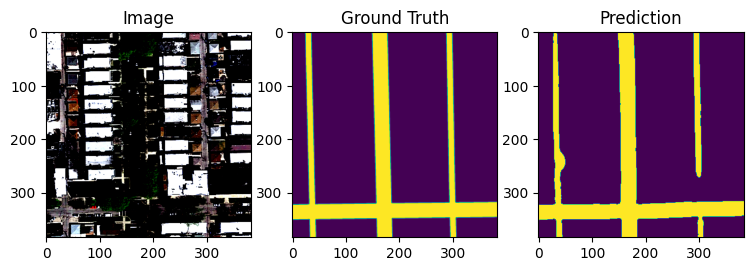

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


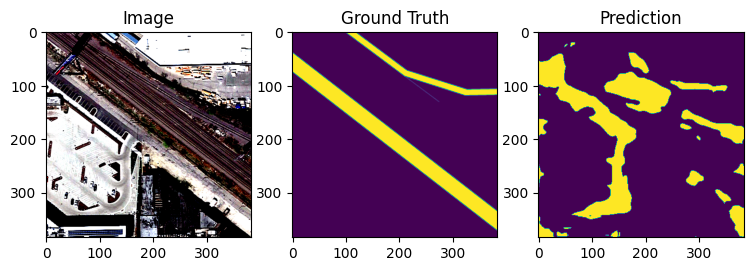

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


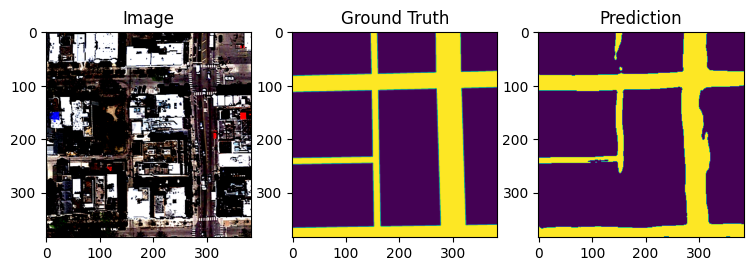

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


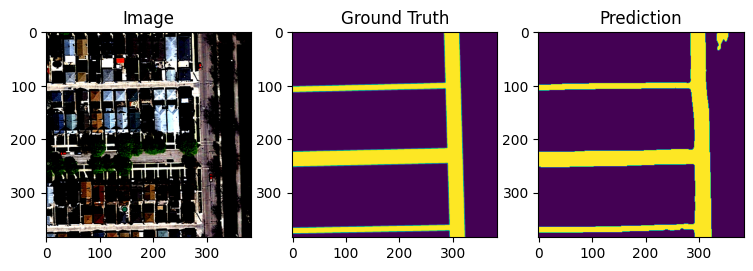

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


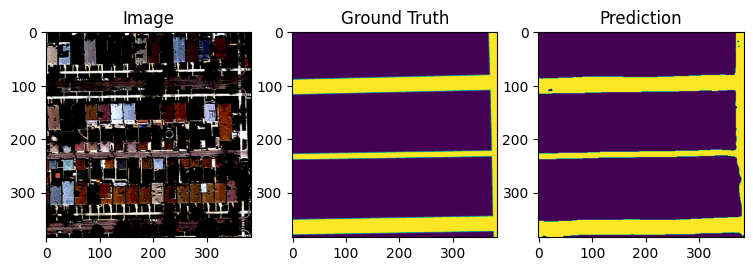

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


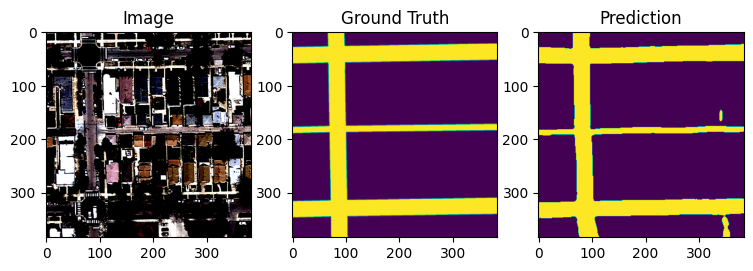

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


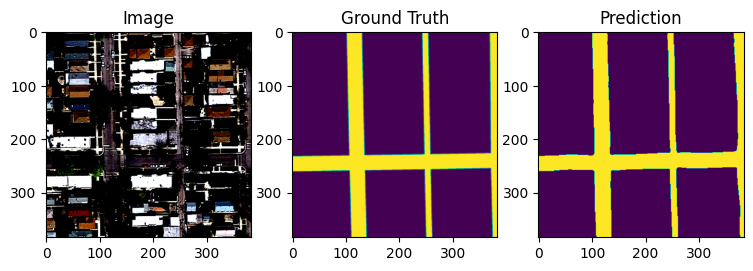

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


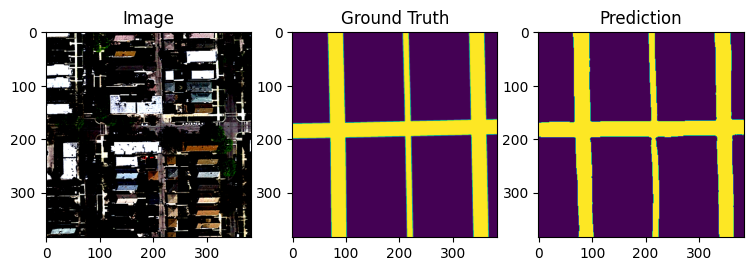

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


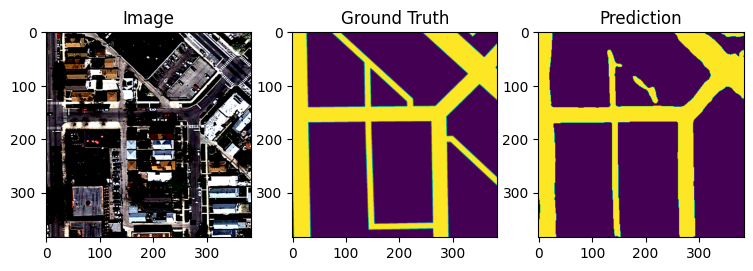

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


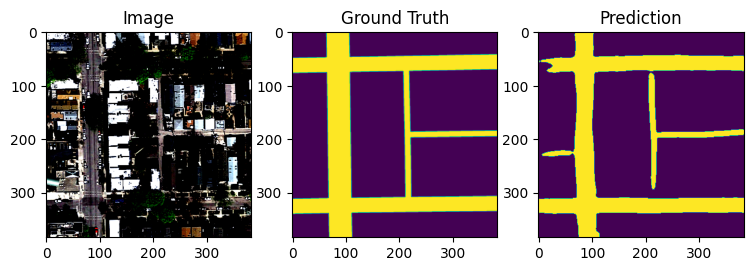

torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


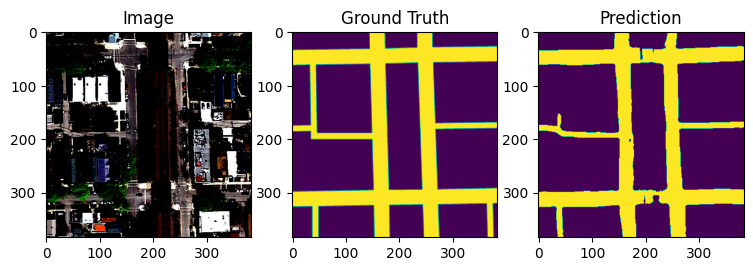

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


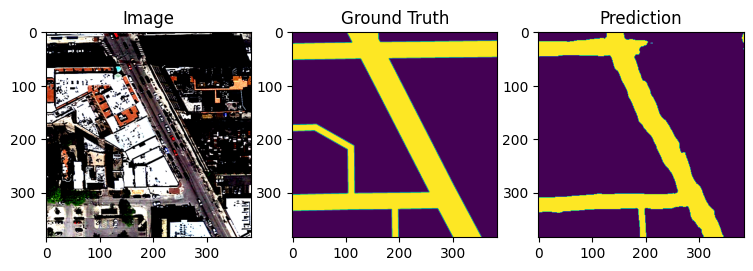

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


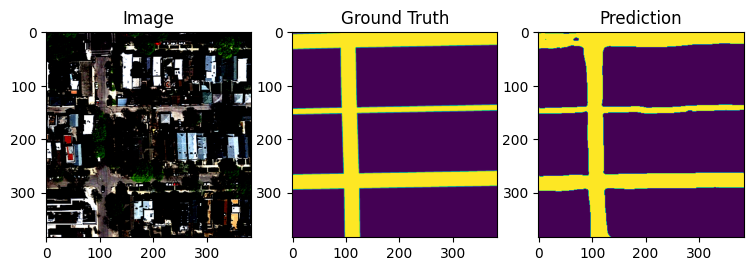

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


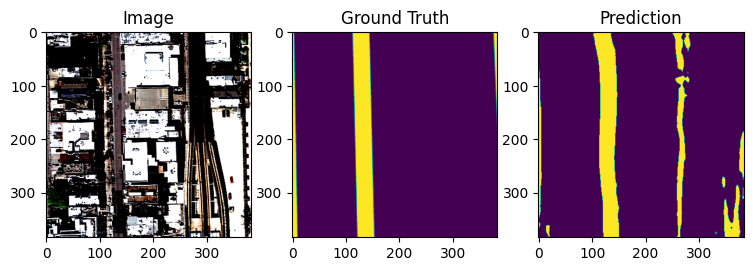

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


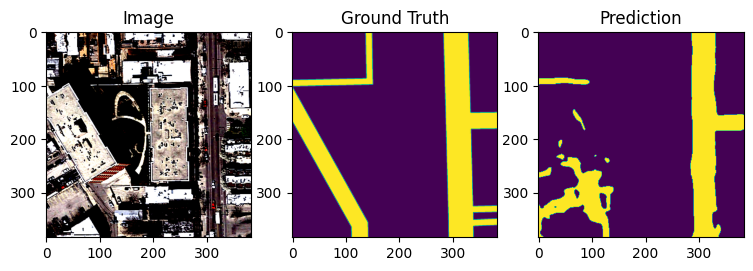

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


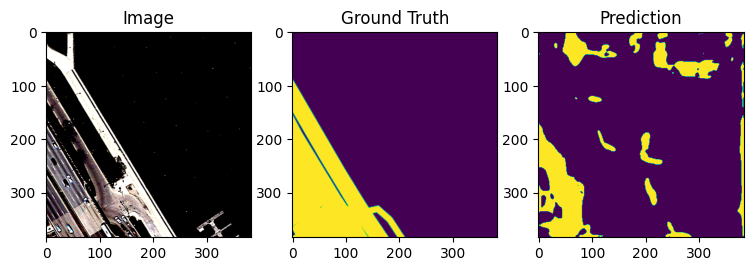

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 384, 384])
min: 0.0
max: 1.0


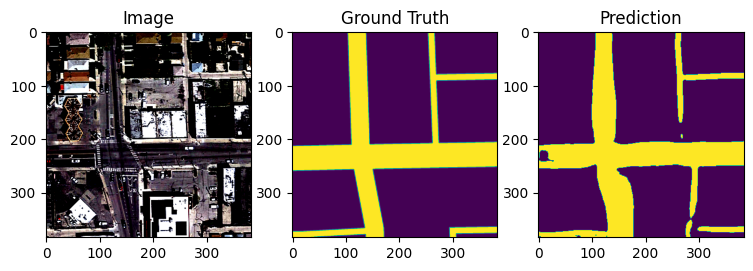

In [93]:
model.eval()
# define threshold
THR = 0.5
# define lists to store predictions and ground truths
predictions = []
groundtruths = []
# visualize
for K in range(len(dataset)):
    # get image and ground truth
    image = image_transform(dataset[K][0])
    gt = gt_transform(dataset[K][1])
    # predict
    prediction = model(image.unsqueeze(0))
    # apply sigmoid
    prediction = torch.sigmoid(prediction)
    prediction = (prediction > THR).float()
    print(prediction.shape)
    # convert to numpy array
    image = image.numpy().transpose(1, 2, 0)
    gt = gt.numpy().squeeze(0)
    prediction = prediction.detach().numpy().squeeze(0).squeeze(0)
    # postprocess
    # prediction = apply_morphological_operations(prediction)
    # print min and max value in prediction
    print("min:", np.min(prediction))
    print("max:", np.max(prediction))
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    ax[0].imshow(image)
    ax[0].set_title("Image")
    ax[1].imshow(gt)
    ax[1].set_title("Ground Truth")
    ax[2].imshow(prediction)
    ax[2].set_title("Prediction")
    plt.show()
    # append predictions and ground truths for evaluation later
    predictions.append(prediction)
    groundtruths.append(gt)